<a href="https://colab.research.google.com/github/AhuodY/Ahuod_Resp/blob/main/Activity2_questions_Ahuod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [2]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [5]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [6]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [7]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-7-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [54]:
#merged_data.dtypes

In [8]:
pollution_data = merged_data[['pm10','neighborhood']]

In [9]:
pollution_data.shape[0]

118495

In [55]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [10]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [11]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [12]:
pollution_data['pm10'].min()

0.0

In [13]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [14]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [15]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [ ]:
joined_table.show(5)

temperature,humidity,pm25,pm10,neighborhood,PM25_Category
16.3,15.2,5.91,11.35,Bronx Park,Good
16.2,15.1,1.18,1.18,Bronx Park,Good
16.1,15.1,0.76,0.76,Bronx Park,Good
16.1,15.2,4.48,47.36,Bronx Park,Good
16,15.2,5.77,6.18,Bronx Park,Good


In [31]:
num_rows = joined_table.num_rows          #num_rows, num_columns are used to find the total number of rows, columns in a table
num_columns = joined_table.num_columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 118495
Number of columns: 6


Identify missing values:

In [49]:
# find missing values
missing_values = joined_table.to_df().isna().sum()    # .isna(): Checks for missing (None/NaN) values, .sum(): Counts them by column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
temperature      0
humidity         0
pm25             0
pm10             0
neighborhood     0
borough          0
PM25_Category    0
dtype: int64


In [33]:
# Convert joined_table back to DataFrame to handle the missing values and drop them if any
df = joined_table.to_df()

# Drop rows with missing values, .dropna(): removes any row with None/NaN values)
cleaned_df = df.dropna()

# Convert back to DataScience Table
cleaned_table = Table().from_df(cleaned_df)


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [50]:
attributes = ['temperature', 'humidity', 'pm25']
means = []   # List to store mean/medians
medians = []
mins = []    # List to store min/max
maxs = []

# for loop through each attribute and find mean/median..etc.
for col in attributes:
    column_data = joined_table.column(col)     # Get data for the column
    means.append(np.mean(column_data))         # Calculate and store mean/median
    medians.append(np.median(column_data))
    mins.append(min(column_data))             # Find and store min/max
    maxs.append(max(column_data))

# Create a table
summary_stats = Table().with_columns(
    "Attribute", attributes,
    "Mean", means,
    "Median", medians,
    "Min", mins,
    "Max", maxs
)

summary_stats.show()


Attribute,Mean,Median,Min,Max
temperature,8.24158,7.2,-7.9,10471
humidity,50.1549,46.2,0,104.2
pm25,7.37452,3.02,0,3267.02


In [51]:
# Group data by neighborhood then calculate the mean of each group
average_pm25_by_borough = joined_table.group("neighborhood", np.mean).select("neighborhood", "pm25 mean")

# show the table
average_pm25_by_borough.show()


neighborhood,pm25 mean
Allerton,4.20833
Astoria,1.29268
Belmont,15.053
Bronx Park,6.87867
Bronxdale,3.53619
Civic Center,4.09232
Claremont Village,5.6469
Concourse,8.44021
Concourse Village,6.84481
Country Club,12.8344


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

In [52]:
print("Columns in joined_table:", joined_table.labels)  # Lists all available column names


Columns in joined_table: ('temperature', 'humidity', 'pm25', 'pm10', 'neighborhood', 'borough', 'PM25_Category')


In [53]:
# Ensure the merged dataset includes 'borough' information
pollution_data = merged_data[['temperature', 'humidity', 'pm25', 'pm10', 'neighborhood', 'borough']]  # Ensure 'borough' exists
joined_table = Table().from_df(pollution_data)  # Convert to a DataScience Table


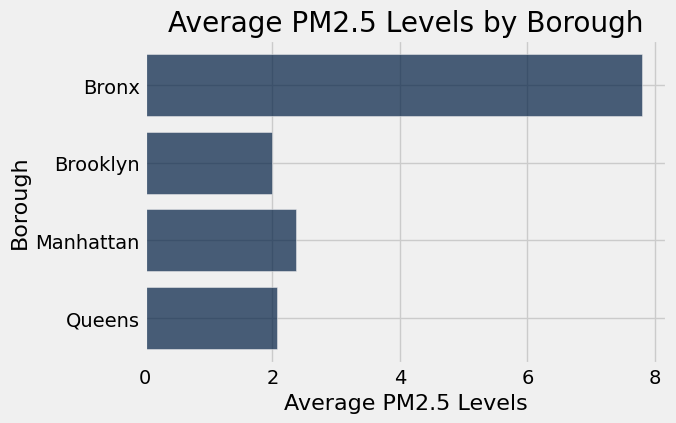

In [39]:
# Calculate average PM2.5 levels for each borough
average_pm25_by_borough = joined_table.group('borough', np.mean).select('borough', 'pm25 mean')

# Create a horizontal bar chart
average_pm25_by_borough.sort('borough').barh("borough", "pm25 mean")

# Add labels and title
plt.title("Average PM2.5 Levels by Borough")
plt.xlabel("Average PM2.5 Levels")
plt.ylabel("Borough")
plt.show()


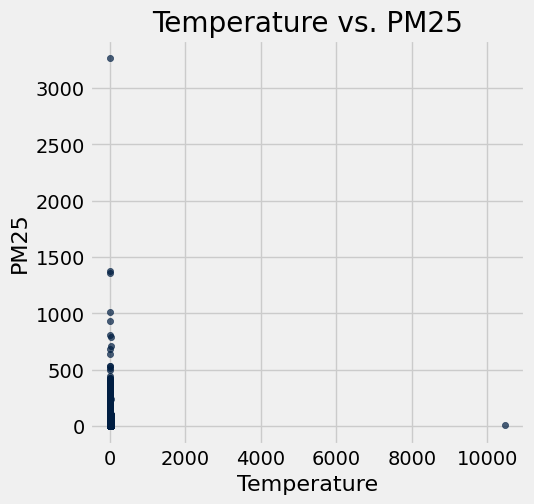

In [40]:
# Scatter plot: Relationship between temperature and PM25
joined_table.scatter("temperature", "pm25")

# Set title and axis labels using matplotlib
plt.title("Temperature vs. PM25")
plt.xlabel("Temperature")
plt.ylabel("PM25")
plt.show()



In [41]:
# Print basic statistics for the temperature column
temperature_data = joined_table.column("temperature")
print("Temperature Stats:")
print("Min:", min(temperature_data), "Max:", max(temperature_data), "Mean:", np.mean(temperature_data))

# Check for outliers or unusual values
print("First few temperatures:", temperature_data[:10])


Temperature Stats:
Min: -7.9 Max: 10471.0 Mean: 8.24157728174
First few temperatures: [ 16.3  16.2  16.1  16.1  16.   15.9  15.8  15.8  15.7  15.6]


**The scatter plot doesn't show clear association therefore, redo after removing the shown outliers**

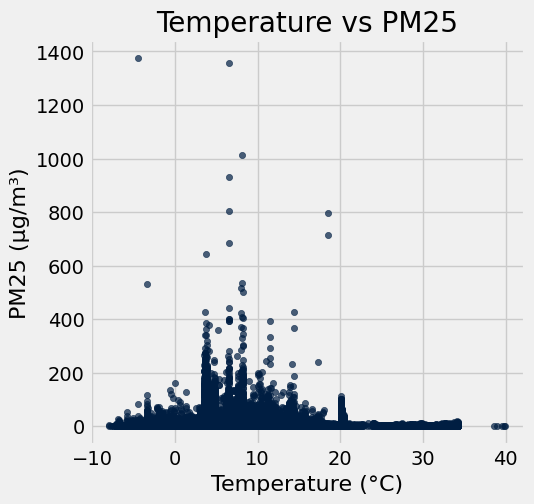

In [42]:
# Remove outliers from pm25 and temperature columns
scatterTable = joined_table.where(joined_table.column('pm25') < 2000)  # Adjust threshold for PM25 outliers
scatterTable = scatterTable.where(scatterTable.column('temperature') < 1000)  # Adjust threshold for temperature outliers

# Create a scatter plot to visualize the relationship between temperature and PM25
scatterTable.scatter('temperature', 'pm25')

# Add appropriate labels and a title to the plot
plt.xlabel('Temperature (°C)')  # Ensure units are correct
plt.ylabel('PM25 (µg/m³)')  # Add units for clarity
plt.title('Temperature vs PM25')

# Display the plot
plt.show()


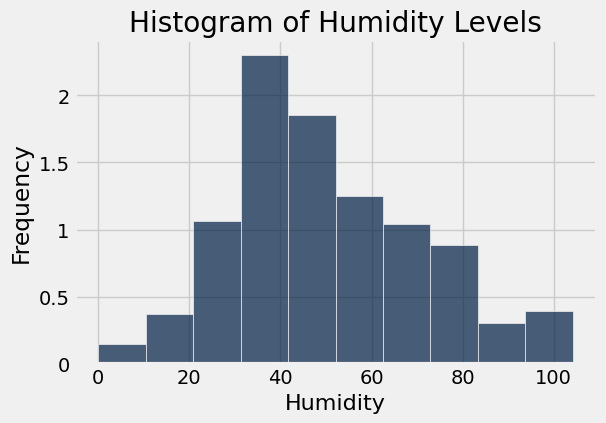

In [43]:
# Histogram of humidity levels
joined_table.hist("humidity", bins=10)

# Set the title using matplotlib
plt.title("Histogram of Humidity Levels")
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.show()


# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [44]:
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"
    elif 12 <= pm25 < 35:
        return "Moderate"
    else:
        return "Unhealthy"


In [45]:
joined_table = joined_table.with_columns(
    "PM25_Category", joined_table.apply(calculate_pm25_category, "pm25")
)


In [46]:
pm25_counts = joined_table.group("PM25_Category")
pm25_counts.show()


PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [47]:
# Calculate the number of rows to sample (10% of total rows)
num_rows_to_sample = int(0.1 * joined_table.num_rows)

# Randomly sample 10% of the rows without replacement
sampled_data = joined_table.sample(k=num_rows_to_sample, with_replacement=False)

# Calculate the mean pm25 level for the sampled data
mean_pm25_sample = np.mean(sampled_data.column("pm25"))
print("Mean PM25 for sampled data:", mean_pm25_sample)


Mean PM25 for sampled data: 7.30147944974


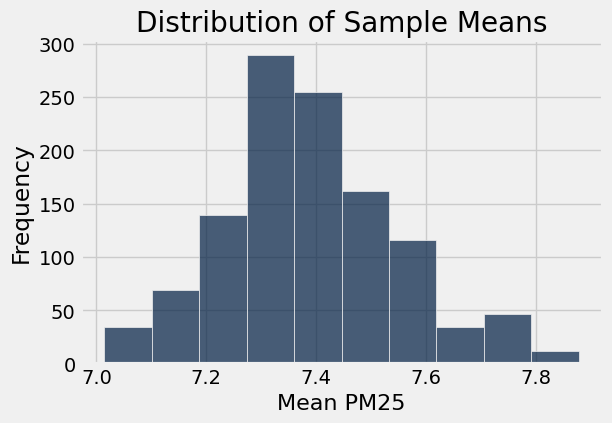

In [48]:
# Calculate the number of rows to sample (10% of total rows)
num_rows_to_sample = int(0.1 * joined_table.num_rows)

# Initialize a list to store mean PM25 values
sample_means = []

# Repeat sampling 100 times
for i in range(100):
    sampled_data = joined_table.sample(k=num_rows_to_sample, with_replacement=False)
    mean_pm25 = np.mean(sampled_data.column("pm25"))
    sample_means.append(mean_pm25)

# Create a table with the sample means
sample_means_table = Table().with_columns("Sample Means", sample_means)

# Plot a histogram of the 100 mean PM25 values
sample_means_table.hist("Sample Means", bins=10)

# Set title and labels using Matplotlib
plt.title("Distribution of Sample Means")
plt.xlabel("Mean PM25")
plt.ylabel("Frequency")
plt.show()


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.